<a href="https://colab.research.google.com/github/chasekenyon/GoEmotion/blob/master/GoEmotion_Analysis_and_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from datasets import load_dataset


In [ ]:
# pip install optuna transformers datasets torchmetrics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
emotions = load_dataset("go_emotions", "raw")

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})

In [ ]:
df = emotions['train'].to_pandas()
df.head()

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


In [ ]:
id2label = {0:"admiration",
            1:"amusement",
            2:"anger",
            3:"annoyance",
            4:"approval",
            5:"caring",
            6:"confusion",
            7:"curiosity",
            8:"desire",
            9:"disappointment",
            10:"disapproval",
            11:"disgust",
            12:"embarrassment",
            13:"excitement",
            14:"fear",
            15:"gratitude",
            16:"grief",
            17:"joy",
            18:"love",
            19:"nervousness",
            20:"optimism",
            21:"pride",
            22:"realization",
            23:"relief",
            24:"remorse",
            25:"sadness",
            26:"surprise",
            27:"neutral"}

In [ ]:
labels = df.iloc[:, -28:].values  # select the last 28 columns
labels = torch.tensor(labels)  # convert to a PyTorch tensor
labels.shape

torch.Size([211225, 28])

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

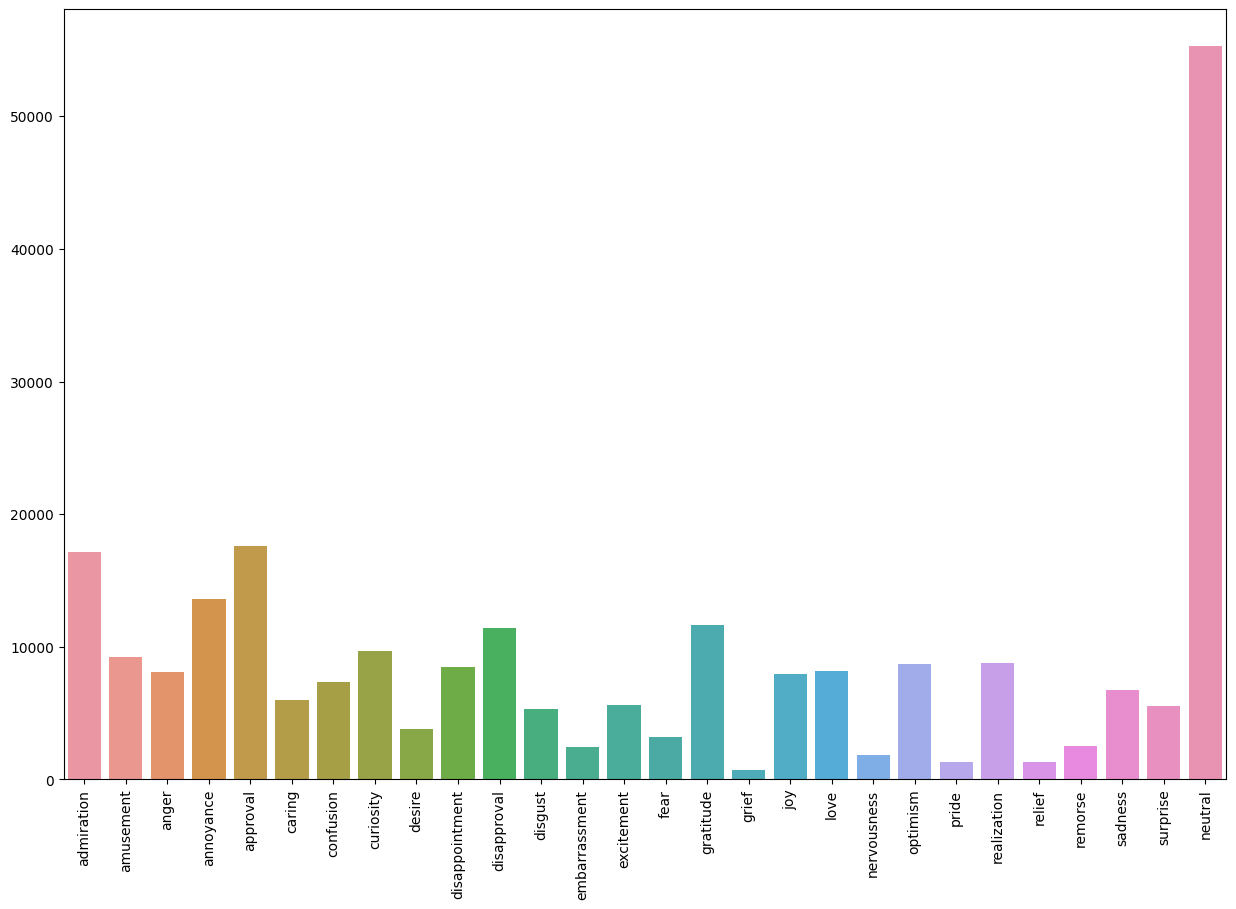

In [ ]:
# Count the instances of each label
label_counts = df.iloc[:, -28:].sum()

# Visualize the distribution of labels
plt.figure(figsize=(15,10))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=90)
plt.show()

Mean text length:  12.99718783287963
Min text length:  1
Max text length:  33


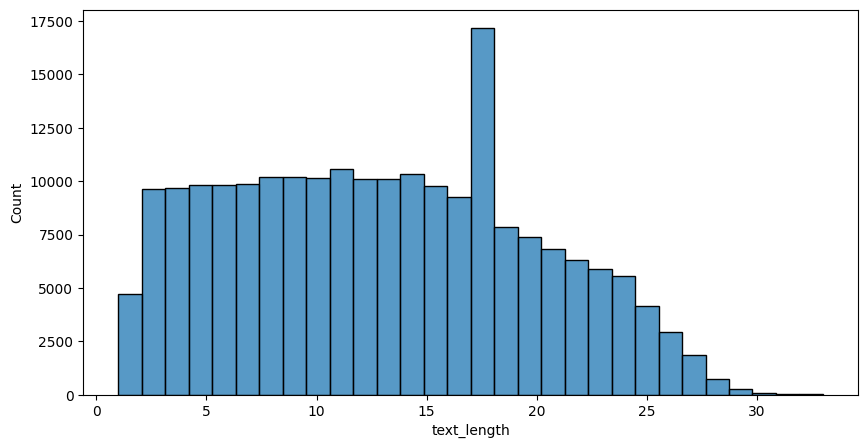

In [ ]:
# Create a new column in the dataframe for the length of the text
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

# Print the mean, min and max text length
print("Mean text length: ", df['text_length'].mean())
print("Min text length: ", df['text_length'].min())
print("Max text length: ", df['text_length'].max())

# Plot a histogram of the text length
plt.figure(figsize=(10,5))
sns.histplot(df['text_length'], bins=30)
plt.show()


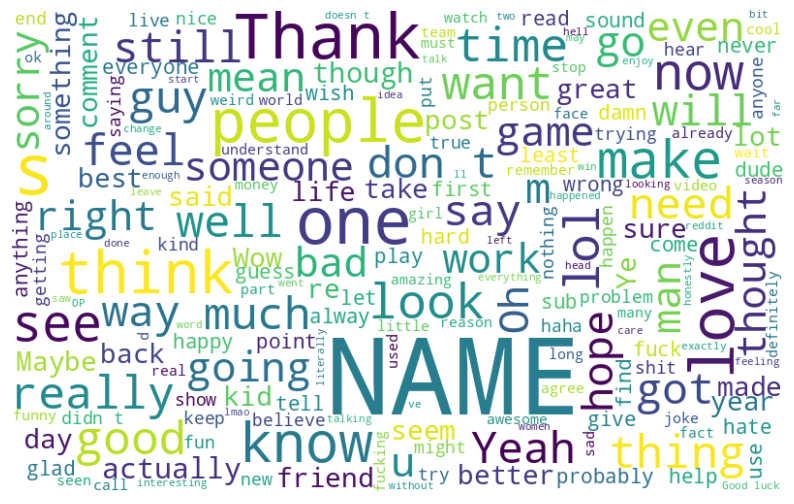

In [ ]:
# Combine all the text in your dataframe
all_text = ' '.join(text for text in df['text'])

# Generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


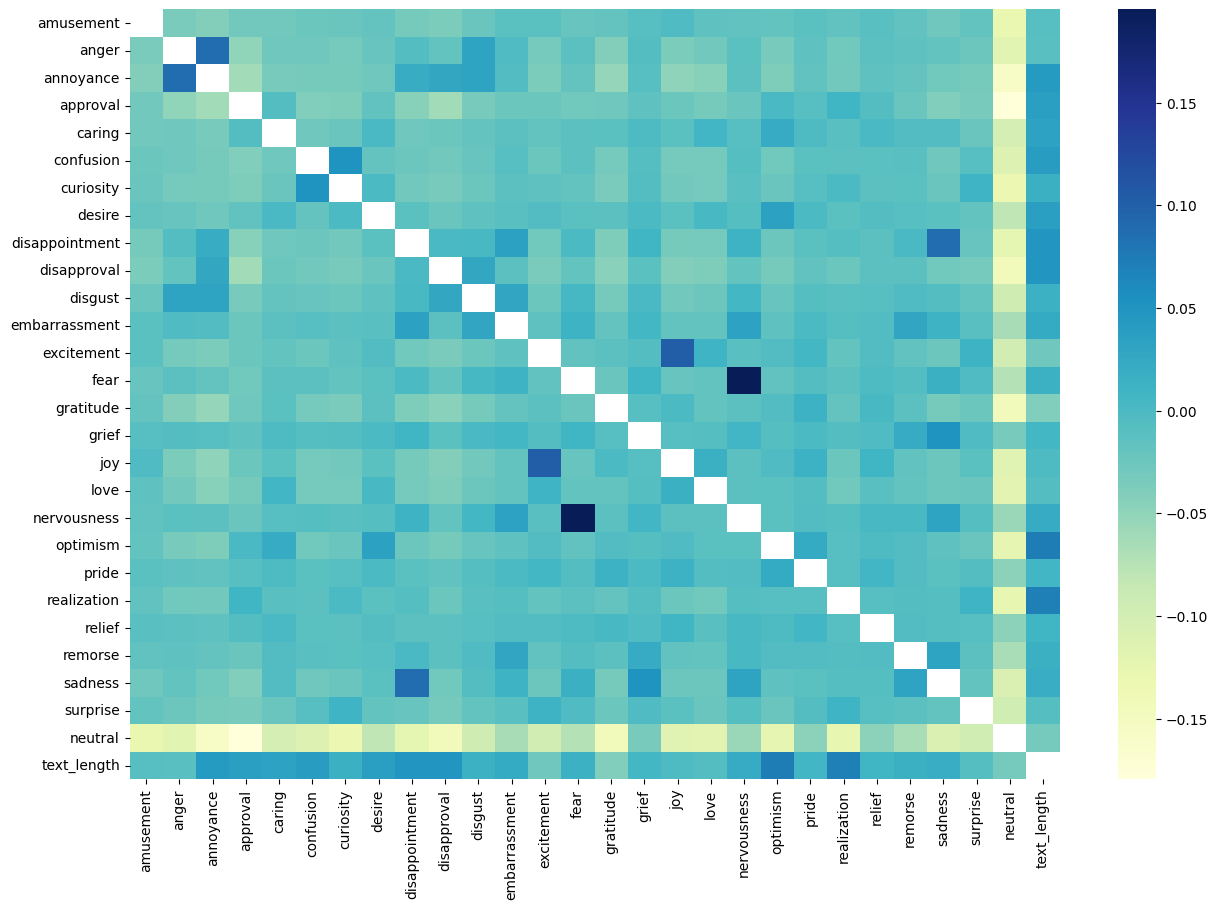

In [ ]:
import numpy as np

# Compute the correlation matrix
correlation_matrix = df.iloc[:, -28:].corr()

# Replace the diagonal values with NaN
np.fill_diagonal(correlation_matrix.values, np.nan)

# Create a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, cmap='YlGnBu')
plt.show()

In [ ]:
def init_weights(model):
    if type(model) == torch.nn.Linear:
        torch.nn.init.xavier_uniform_(model.weight)
        model.bias.data.fill_(0.01)

In [ ]:
def get_data_loaders(df, labels, batch_size, encoding_max_size):
    # Split the data into train, validation and test sets
    df_train, df_temp, labels_train, labels_temp = train_test_split(
        df,  # the DataFrame
        labels,  # the labels
        random_state=42,  # for reproducibility
        test_size=0.2  # 20% of the data for temp set
    )

    # Creating the validation set from the temp set
    df_val, df_test, labels_val, labels_test = train_test_split(
        df_temp,
        labels_temp,
        random_state=42,
        test_size=0.5  # Split the temp set into half for validation and test sets
    )

    # Initialize the tokenizer
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=False)

    # Encode the text for each split separately
    encoded_inputs_train = tokenizer(df_train['text'].tolist(), padding='longest', truncation=True, max_length=encoding_max_size, return_tensors='pt')
    encoded_inputs_val = tokenizer(df_val['text'].tolist(), padding='longest', truncation=True, max_length=encoding_max_size, return_tensors='pt')
    encoded_inputs_test = tokenizer(df_test['text'].tolist(), padding='longest', truncation=True, max_length=encoding_max_size, return_tensors='pt')

    # Inputs
    train_inputs = encoded_inputs_train['input_ids']
    val_inputs = encoded_inputs_val['input_ids']
    test_inputs = encoded_inputs_test['input_ids']

    # Labels
    train_labels = labels_train
    val_labels = labels_val
    test_labels = labels_test

    # Attention masks
    train_masks = encoded_inputs_train['attention_mask']
    val_masks = encoded_inputs_val['attention_mask']
    test_masks = encoded_inputs_test['attention_mask']

    # Create the DataLoader for our training set.
    train_data = TensorDataset(train_inputs, train_masks, train_labels)
    train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

    # Create the DataLoader for our validation set.
    val_data = TensorDataset(val_inputs, val_masks, val_labels)
    val_dataloader = DataLoader(val_data, batch_size=batch_size)

    # Create the DataLoader for our test set.
    test_data = TensorDataset(test_inputs, test_masks, test_labels)
    test_dataloader = DataLoader(test_data, batch_size=batch_size)

    return train_dataloader, val_dataloader, test_dataloader


In [ ]:
import numpy as np
import torch
import os
from torchmetrics import F1Score, Precision, Recall
from sklearn.metrics import accuracy_score
import random
from transformers import RobertaTokenizer
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, TensorDataset, SequentialSampler
from transformers import RobertaForSequenceClassification
from torch.optim import AdamW
from torch.nn import BCEWithLogitsLoss
from transformers import get_linear_schedule_with_warmup
import random
import time
import datetime
import logging

seed_val = 42

# Set the seed value all over the place to make this reproducible.
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

loss_function = BCEWithLogitsLoss()

def train_and_validate(trial, df, labels):
    # Hyperparameters to optimize
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32, 64, 128])
    encoding_max_size = trial.suggest_int('encoding_max_size', 10, 100)
    epochs = trial.suggest_int('epochs', 1, 10)
    learning_rate = trial.suggest_float('lr', 1e-5, 1e-3, log=True)
    weight_decay = trial.suggest_float("weight_decay", 0.0, 0.2)

    logger = logging.getLogger(__name__)
    logging.basicConfig(level=logging.INFO)

    tokenizer = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case = True)

    train_dataloader, val_dataloader, test_dataloader = get_data_loaders(df, labels, batch_size, encoding_max_size)

    best_f1 = None

    num_labels = 28

    def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
        acc_list = []
        for i in range(y_true.shape[0]):
            set_true = set(np.where(y_true[i])[0])
            set_pred = set(np.where(y_pred[i])[0])
            tmp_a = None
            if len(set_true) == 0 and len(set_pred) == 0:
                tmp_a = 1
            else:
                tmp_a = len(set_true.intersection(set_pred)) / float(len(set_true.union(set_pred)))
            acc_list.append(tmp_a)
        return np.mean(acc_list)

    def format_time(elapsed):
        '''
        Takes a time in seconds and returns a string hh:mm:ss
        '''
        # Round to the nearest second.
        elapsed_rounded = int(round((elapsed)))

        # Format as hh:mm:ss
        return str(datetime.timedelta(seconds=elapsed_rounded))

    # Check if GPU is available
    if torch.cuda.is_available():
        # Tell PyTorch to use the GPU.
        device = torch.device("cuda")
        # print('There are %d GPU(s) available.' % torch.cuda.device_count())
        # print('We will use the GPU:', torch.cuda.get_device_name(0))
    else:
        # print('No GPU available, using the CPU instead.')
        device = torch.device("cpu")

    logger.info("Loading pre-trained model (weights)")
    # Load pre-trained model (weights)
    model = RobertaForSequenceClassification.from_pretrained(
        "roberta-base",
        num_labels = num_labels,
        output_attentions = False,
        output_hidden_states = False,
        problem_type = 'multi_label_classification'
    )

    # Initialize the weights of the model
    model.apply(init_weights)

    model = model.to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay = weight_decay)

    epochs = epochs  # Number of training epochs.

    # Total number of training steps is [number of batches] x [number of epochs].
    total_steps = len(train_dataloader) * epochs

    # Create the learning rate scheduler.
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps = 0,
                                                num_training_steps = total_steps)

    random.seed(seed_val)

    #Training / Validation Loops
    # For early stopping
    patience = 2  # Number of epochs with no improvement after which training will be stopped.
    epochs_no_improve = 0
    best_val_loss = None

    f1_score = F1Score(num_labels=num_labels, average='macro', task="multilabel").to(device)
    precision = Precision(num_labels=num_labels, average='macro', task="multilabel").to(device)
    recall = Recall(num_labels=num_labels, average='macro', task="multilabel").to(device)

    # For each epoch...
    for epoch_i in range(0, epochs):

        # ========================================
        #               Training
        # ========================================

        # Perform one full pass over the training set.

        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        # print('Training...')

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        total_loss = 0
        eval_accuracy = 0

        # Reset the metrics for this epoch.
        f1_score.reset()
        precision.reset()
        recall.reset()

        # Put the model into training mode.
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):

            # Progress update every 40 batches.
            if step % 1000 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)

                # Report progress.
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

            # `batch` contains three pytorch tensors:
            #   [0]: input ids
            #   [1]: attention masks
            #   [2]: labels
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Perform a forward pass
            outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels.float())
            logits = outputs.logits  # Get the logits

            # Compute loss
            loss = loss_function(logits.view(-1, num_labels), b_labels.view(-1, num_labels).float())

            # Backward pass
            loss.backward()

            # Clip the norm of the gradients to 1.0.
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and take a step using the computed gradient
            optimizer.step()

            # Update the learning rate.
            scheduler.step()

            # Clear the gradients
            model.zero_grad()

            # Accumulate the training loss over all of the batches so that we can
            # calculate the average loss at the end.
            total_loss += loss.item()

        # Calculate the average loss over the training data.
        avg_train_loss = total_loss / len(train_dataloader)

        # Store the loss value for plotting the learning curve.
        loss_values.append(avg_train_loss)

        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training epoch took: {:}".format(format_time(time.time() - t0)))

        # ========================================
        #               Validation
        # ========================================
        # After the completion of each training epoch, measure performance on
        # validation set.

        print("")
        print("Running Validation...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()

        # Tracking variables
        eval_loss, eval_accuracy = 0, 0
        nb_eval_steps, nb_eval_examples = 0, 0

        # Evaluate data for one epoch
        for batch in val_dataloader:

            # Add batch to GPU
            batch = tuple(t.to(device) for t in batch)

            # Unpack the inputs from our dataloader
            b_input_ids, b_input_mask, b_labels = batch

            # Telling the model not to compute or store gradients, saving memory and
            # speeding up validation
            with torch.no_grad():
                # Forward pass, calculate logit predictions and loss
                outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels.float())
                loss = outputs.loss
                logits = outputs.logits  # Keep logits as tensor

                # Accumulate the validation loss.
                eval_loss += loss.item()

                # Move logits to CPU and convert to NumPy for accuracy calculation
                logits_np = logits.detach().cpu().numpy()
                label_ids = b_labels.to('cpu').numpy()

                # Calculate the accuracy for this batch of test sentences.
                tmp_eval_accuracy = hamming_score(label_ids, np.round(logits_np))

                # Accumulate the total accuracy.
                eval_accuracy += tmp_eval_accuracy

                # Compute the F1 score, Precision, and Recall using the original logits tensor
                probs = torch.sigmoid(logits)  # get the predicted probabilities
                preds = (probs > 0.5).int()  # apply a threshold to get the predicted classes
                preds = preds.to(device)
                b_labels = b_labels.to(device)

                f1_score.update(preds, b_labels)  # update the F1Score object with the current batch's predictions and labels
                precision.update(preds, b_labels)
                recall.update(preds, b_labels)

                # Track the number of batches
                nb_eval_steps += 1

        # After the validation loop
        final_f1 = f1_score.compute()  # compute the overall F1 score after all epochs
        final_precision = precision.compute()
        final_recall = recall.compute()

        # Update the learning rate.
        scheduler.step()

        # Report the average F1 score to Optuna
        trial.report(final_f1, epoch_i)

        # Check if the trial should be pruned
        if trial.should_prune():
          raise optuna.TrialPruned()

        # After evaluating all batches, calculate average validation loss
        avg_val_loss = eval_loss / len(val_dataloader)
        print("  Validation Loss: ", avg_val_loss)

        # Compute the F1 score, Precision, and Recall using the original logits tensor
        probs = torch.sigmoid(logits)  # get the predicted probabilities
        preds = (probs > 0.5).int()  # apply a threshold to get the predicted classes
        preds = preds.to(device)
        b_labels = b_labels.to(device)

        # Report the final accuracy and F1 for this validation run.
        final_accuracy = eval_accuracy / len(val_dataloader)
        print("  Accuracy: {0:.2f}".format(final_accuracy))
        print("  Precision: ", final_precision.item())
        print("  Recall: ", final_recall.item())
        print("  F1 Score: ", final_f1.item())
        print("  Validation took: {:}".format(format_time(time.time() - t0)))

        # Early stopping code
        if best_f1 is None or final_f1 > best_f1:
            epochs_no_improve = 0
            best_f1 = final_f1
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print('Early stopping!')
                break

    return final_f1

In [ ]:
import optuna
from optuna.pruners import MedianPruner

# Create a pruner instance
pruner = MedianPruner(n_startup_trials=5, n_warmup_steps=2, interval_steps=1)

In [ ]:
# Using Google Drive to save model state in case colab ends runtime after study while not at PC
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/optuna_studies/optuna_study.db"

Mounted at /content/drive


In [ ]:
import optuna

study_name = '100% Data Study 1.0'

In [ ]:
# optuna.study.delete_study(study_name=study_name, storage=f'sqlite:///{path}')

In [ ]:
# Create an Optuna study object and start the hyperparameter tuning process
study = optuna.create_study(direction='maximize', study_name=study_name, storage=f'sqlite:///{path}', pruner = pruner)
study.optimize(lambda trial: train_and_validate(trial, df, labels), n_trials=20)

# Print the optimal hyperparameters
print(study.best_params)

[I 2023-08-08 20:30:11,639] A new study created in RDB with name: 100% Data Study 1.0
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 4 ========
  Batch 1,000  of  10,562.    Elapsed: 0:01:34.
  Batch 2,000  of  10,562.    Elapsed: 0:03:06.
  Batch 3,000  of  10,562.    Elapsed: 0:04:38.
  Batch 4,000  of  10,562.    Elapsed: 0:06:09.
  Batch 5,000  of  10,562.    Elapsed: 0:07:41.
  Batch 6,000  of  10,562.    Elapsed: 0:09:12.
  Batch 7,000  of  10,562.    Elapsed: 0:10:44.
  Batch 8,000  of  10,562.    Elapsed: 0:12:15.
  Batch 9,000  of  10,562.    Elapsed: 0:13:46.
  Batch 10,000  of  10,562.    Elapsed: 0:15:17.

  Average training loss: 0.16
  Training epoch took: 0:16:07

Running Validation...
  Validation Loss:  0.15752522968302884
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:35

======== Epoch 2 / 4 ========
  Batch 1,000  of  10,562.    Elapsed: 0:01:32.
  Batch 2,000  of  10,562.    Elapsed: 0:03:03.
  Batch 3,000  of  10,562.    Elapsed: 0:04:35.
  Batch 4,000  of  10,562.    Elapsed: 0:06:06.
  Batch 5,000  of  10,562.    Elapsed: 0:07:38

[I 2023-08-08 21:21:38,143] Trial 0 finished with value: 0.0 and parameters: {'batch_size': 16, 'encoding_max_size': 91, 'epochs': 4, 'lr': 6.108831484760365e-05, 'weight_decay': 0.1431269175263295}. Best is trial 0 with value: 0.0.


  Validation Loss:  0.15671317691630618
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:36
Early stopping!


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 3 ========
  Batch 1,000  of  1,321.    Elapsed: 0:02:47.

  Average training loss: 0.16
  Training epoch took: 0:03:41

Running Validation...
  Validation Loss:  0.15731804036950492
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:09

======== Epoch 2 / 3 ========
  Batch 1,000  of  1,321.    Elapsed: 0:02:47.

  Average training loss: 0.16
  Training epoch took: 0:03:41

Running Validation...
  Validation Loss:  0.15679761170443282
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:09

======== Epoch 3 / 3 ========
  Batch 1,000  of  1,321.    Elapsed: 0:02:47.

  Average training loss: 0.16
  Training epoch took: 0:03:41

Running Validation...


[I 2023-08-08 21:33:50,660] Trial 1 finished with value: 0.0 and parameters: {'batch_size': 128, 'encoding_max_size': 25, 'epochs': 3, 'lr': 0.00022379591569300639, 'weight_decay': 0.12844924612004102}. Best is trial 0 with value: 0.0.


  Validation Loss:  0.15645130777574448
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:09
Early stopping!


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 5 ========
  Batch 1,000  of  2,641.    Elapsed: 0:03:40.
  Batch 2,000  of  2,641.    Elapsed: 0:07:20.

  Average training loss: 0.13
  Training epoch took: 0:09:41

Running Validation...
  Validation Loss:  0.12056055948633441
  Accuracy: 0.04
  Precision:  0.45927760004997253
  Recall:  0.15326517820358276
  F1 Score:  0.18741407990455627
  Validation took: 0:00:24

======== Epoch 2 / 5 ========
  Batch 1,000  of  2,641.    Elapsed: 0:03:40.
  Batch 2,000  of  2,641.    Elapsed: 0:07:20.

  Average training loss: 0.12
  Training epoch took: 0:09:41

Running Validation...
  Validation Loss:  0.11714832486973069
  Accuracy: 0.03
  Precision:  0.4882006049156189
  Recall:  0.15551376342773438
  F1 Score:  0.20363162457942963
  Validation took: 0:00:24

======== Epoch 3 / 5 ========
  Batch 1,000  of  2,641.    Elapsed: 0:03:40.
  Batch 2,000  of  2,641.    Elapsed: 0:07:20.

  Average training loss: 0.12
  Training epoch took: 0:09:41

Running Validation...
  Valid

[I 2023-08-08 22:25:05,314] Trial 2 finished with value: 0.24880734086036682 and parameters: {'batch_size': 64, 'encoding_max_size': 67, 'epochs': 5, 'lr': 1.854804621623978e-05, 'weight_decay': 0.15024249771616324}. Best is trial 2 with value: 0.24880734086036682.


  Validation Loss:  0.11462057267070896
  Accuracy: 0.04
  Precision:  0.5273920893669128
  Recall:  0.1967269778251648
  F1 Score:  0.24880734086036682
  Validation took: 0:00:24


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 6 ========
  Batch 1,000  of  2,641.    Elapsed: 0:02:52.
  Batch 2,000  of  2,641.    Elapsed: 0:05:44.

  Average training loss: 0.16
  Training epoch took: 0:07:33

Running Validation...
  Validation Loss:  0.15759348819803254
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:18

======== Epoch 2 / 6 ========
  Batch 1,000  of  2,641.    Elapsed: 0:02:51.
  Batch 2,000  of  2,641.    Elapsed: 0:05:43.

  Average training loss: 0.16
  Training epoch took: 0:07:33

Running Validation...
  Validation Loss:  0.15680299721815796
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:18

======== Epoch 3 / 6 ========
  Batch 1,000  of  2,641.    Elapsed: 0:02:51.
  Batch 2,000  of  2,641.    Elapsed: 0:05:43.

  Average training loss: 0.16
  Training epoch took: 0:07:32

Running Validation...


[I 2023-08-08 22:49:19,535] Trial 3 finished with value: 0.0 and parameters: {'batch_size': 64, 'encoding_max_size': 53, 'epochs': 6, 'lr': 0.0002485597581219358, 'weight_decay': 0.04211730736039057}. Best is trial 2 with value: 0.24880734086036682.


  Validation Loss:  0.15680094914133816
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:18
Early stopping!


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 9 ========
  Batch 1,000  of  2,641.    Elapsed: 0:03:43.
  Batch 2,000  of  2,641.    Elapsed: 0:07:27.

  Average training loss: 0.16
  Training epoch took: 0:09:50

Running Validation...
  Validation Loss:  0.157207534122323
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:24

======== Epoch 2 / 9 ========
  Batch 1,000  of  2,641.    Elapsed: 0:03:43.
  Batch 2,000  of  2,641.    Elapsed: 0:07:27.

  Average training loss: 0.16
  Training epoch took: 0:09:50

Running Validation...
  Validation Loss:  0.1568915626523718
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:24

======== Epoch 3 / 9 ========
  Batch 1,000  of  2,641.    Elapsed: 0:03:43.
  Batch 2,000  of  2,641.    Elapsed: 0:07:26.

  Average training loss: 0.16
  Training epoch took: 0:09:49

Running Validation...


[I 2023-08-08 23:20:46,704] Trial 4 finished with value: 0.0 and parameters: {'batch_size': 64, 'encoding_max_size': 69, 'epochs': 9, 'lr': 8.287552196015451e-05, 'weight_decay': 0.03290038937578088}. Best is trial 2 with value: 0.24880734086036682.


  Validation Loss:  0.15680791662718954
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:24
Early stopping!


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 5 ========
  Batch 1,000  of  5,281.    Elapsed: 0:00:52.
  Batch 2,000  of  5,281.    Elapsed: 0:01:44.
  Batch 3,000  of  5,281.    Elapsed: 0:02:37.
  Batch 4,000  of  5,281.    Elapsed: 0:03:28.
  Batch 5,000  of  5,281.    Elapsed: 0:04:22.

  Average training loss: 0.14
  Training epoch took: 0:04:36

Running Validation...
  Validation Loss:  0.13218269366404653
  Accuracy: 0.04
  Precision:  0.24715803563594818
  Recall:  0.0730016827583313
  F1 Score:  0.09279314428567886
  Validation took: 0:00:12

======== Epoch 2 / 5 ========
  Batch 1,000  of  5,281.    Elapsed: 0:00:52.
  Batch 2,000  of  5,281.    Elapsed: 0:01:44.
  Batch 3,000  of  5,281.    Elapsed: 0:02:37.
  Batch 4,000  of  5,281.    Elapsed: 0:03:29.
  Batch 5,000  of  5,281.    Elapsed: 0:04:22.

  Average training loss: 0.13
  Training epoch took: 0:04:36

Running Validation...
  Validation Loss:  0.13084307806664985
  Accuracy: 0.04
  Precision:  0.38663333654403687
  Recall:  0.1074131354689

[I 2023-08-08 23:40:40,054] Trial 5 pruned. 
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 8 ========
  Batch 1,000  of  10,562.    Elapsed: 0:01:24.
  Batch 2,000  of  10,562.    Elapsed: 0:02:49.
  Batch 3,000  of  10,562.    Elapsed: 0:04:14.
  Batch 4,000  of  10,562.    Elapsed: 0:05:39.
  Batch 5,000  of  10,562.    Elapsed: 0:07:03.
  Batch 6,000  of  10,562.    Elapsed: 0:08:29.
  Batch 7,000  of  10,562.    Elapsed: 0:09:53.
  Batch 8,000  of  10,562.    Elapsed: 0:11:18.
  Batch 9,000  of  10,562.    Elapsed: 0:12:42.
  Batch 10,000  of  10,562.    Elapsed: 0:14:08.

  Average training loss: 0.16
  Training epoch took: 0:14:55

Running Validation...
  Validation Loss:  0.15718758266410712
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:35

======== Epoch 2 / 8 ========
  Batch 1,000  of  10,562.    Elapsed: 0:01:26.
  Batch 2,000  of  10,562.    Elapsed: 0:02:50.
  Batch 3,000  of  10,562.    Elapsed: 0:04:15.
  Batch 4,000  of  10,562.    Elapsed: 0:05:40.
  Batch 5,000  of  10,562.    Elapsed: 0:07:05

UnboundLocalError: ignored

In [ ]:
# study = optuna.load_study(study_name=study_name, storage=f'sqlite:///{path}')

Google Colab session ended early, so I am continuing the Optuna study from where it was left off at trial number 5 from my Google Drive Storage.

In [ ]:
# Continue optimization
study.optimize(lambda trial: train_and_validate(trial, df, labels), n_trials=15)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 2 ========
  Batch 1,000  of  2,641.    Elapsed: 0:04:15.
  Batch 2,000  of  2,641.    Elapsed: 0:08:30.

  Average training loss: 0.13
  Training epoch took: 0:11:14

Running Validation...
  Validation Loss:  0.11963951236531814
  Accuracy: 0.04
  Precision:  0.469992458820343
  Recall:  0.13556939363479614
  F1 Score:  0.1674860715866089
  Validation took: 0:00:27

======== Epoch 2 / 2 ========
  Batch 1,000  of  2,641.    Elapsed: 0:04:15.
  Batch 2,000  of  2,641.    Elapsed: 0:08:30.

  Average training loss: 0.12
  Training epoch took: 0:11:13

Running Validation...


[I 2023-08-09 00:45:32,470] Trial 8 finished with value: 0.21638178825378418 and parameters: {'batch_size': 64, 'encoding_max_size': 80, 'epochs': 2, 'lr': 2.2986262012490097e-05, 'weight_decay': 0.15213054953836644}. Best is trial 2 with value: 0.24880734086036682.


  Validation Loss:  0.11657858234787996
  Accuracy: 0.04
  Precision:  0.4447309672832489
  Recall:  0.17198410630226135
  F1 Score:  0.21638178825378418
  Validation took: 0:00:27


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 5 ========
  Batch 1,000  of  21,123.    Elapsed: 0:01:04.
  Batch 2,000  of  21,123.    Elapsed: 0:02:08.
  Batch 3,000  of  21,123.    Elapsed: 0:03:11.
  Batch 4,000  of  21,123.    Elapsed: 0:04:16.
  Batch 5,000  of  21,123.    Elapsed: 0:05:19.
  Batch 6,000  of  21,123.    Elapsed: 0:06:23.
  Batch 7,000  of  21,123.    Elapsed: 0:07:28.
  Batch 8,000  of  21,123.    Elapsed: 0:08:31.
  Batch 9,000  of  21,123.    Elapsed: 0:09:37.
  Batch 10,000  of  21,123.    Elapsed: 0:10:41.
  Batch 11,000  of  21,123.    Elapsed: 0:11:46.
  Batch 12,000  of  21,123.    Elapsed: 0:12:51.
  Batch 13,000  of  21,123.    Elapsed: 0:13:58.
  Batch 14,000  of  21,123.    Elapsed: 0:15:03.
  Batch 15,000  of  21,123.    Elapsed: 0:16:08.
  Batch 16,000  of  21,123.    Elapsed: 0:17:14.
  Batch 17,000  of  21,123.    Elapsed: 0:18:18.
  Batch 18,000  of  21,123.    Elapsed: 0:19:23.
  Batch 19,000  of  21,123.    Elapsed: 0:20:27.
  Batch 20,000  of  21,123.    Elapsed: 0:21:31

[I 2023-08-09 01:57:15,388] Trial 9 finished with value: 0.0 and parameters: {'batch_size': 8, 'encoding_max_size': 94, 'epochs': 5, 'lr': 2.636088755353245e-05, 'weight_decay': 0.15808226119443636}. Best is trial 2 with value: 0.24880734086036682.


  Validation Loss:  0.1569109136314159
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:49
Early stopping!


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 1 ========
  Batch 1,000  of  2,641.    Elapsed: 0:03:35.
  Batch 2,000  of  2,641.    Elapsed: 0:07:08.

  Average training loss: 0.16
  Training epoch took: 0:09:25

Running Validation...


[I 2023-08-09 02:07:51,134] Trial 10 finished with value: 0.0 and parameters: {'batch_size': 64, 'encoding_max_size': 65, 'epochs': 1, 'lr': 0.000648259489774379, 'weight_decay': 0.18141006819346508}. Best is trial 2 with value: 0.24880734086036682.


  Validation Loss:  0.1565967499759622
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:23


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 10 ========
  Batch 1,000  of  21,123.    Elapsed: 0:01:04.
  Batch 2,000  of  21,123.    Elapsed: 0:02:10.
  Batch 3,000  of  21,123.    Elapsed: 0:03:13.
  Batch 4,000  of  21,123.    Elapsed: 0:04:17.
  Batch 5,000  of  21,123.    Elapsed: 0:05:23.
  Batch 6,000  of  21,123.    Elapsed: 0:06:27.
  Batch 7,000  of  21,123.    Elapsed: 0:07:31.
  Batch 8,000  of  21,123.    Elapsed: 0:08:35.
  Batch 9,000  of  21,123.    Elapsed: 0:09:41.
  Batch 10,000  of  21,123.    Elapsed: 0:10:46.
  Batch 11,000  of  21,123.    Elapsed: 0:11:49.
  Batch 12,000  of  21,123.    Elapsed: 0:12:56.
  Batch 13,000  of  21,123.    Elapsed: 0:13:59.
  Batch 14,000  of  21,123.    Elapsed: 0:15:03.
  Batch 15,000  of  21,123.    Elapsed: 0:16:09.
  Batch 16,000  of  21,123.    Elapsed: 0:17:13.
  Batch 17,000  of  21,123.    Elapsed: 0:18:17.
  Batch 18,000  of  21,123.    Elapsed: 0:19:24.
  Batch 19,000  of  21,123.    Elapsed: 0:20:28.
  Batch 20,000  of  21,123.    Elapsed: 0:21:3

[I 2023-08-09 03:20:27,541] Trial 11 finished with value: 0.0 and parameters: {'batch_size': 8, 'encoding_max_size': 91, 'epochs': 10, 'lr': 0.00041657591827989014, 'weight_decay': 0.06309598441888631}. Best is trial 2 with value: 0.24880734086036682.


  Validation Loss:  0.15714052054341296
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:51
Early stopping!


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 7 ========
  Batch 1,000  of  10,562.    Elapsed: 0:01:04.
  Batch 2,000  of  10,562.    Elapsed: 0:02:07.
  Batch 3,000  of  10,562.    Elapsed: 0:03:11.
  Batch 4,000  of  10,562.    Elapsed: 0:04:15.
  Batch 5,000  of  10,562.    Elapsed: 0:05:19.
  Batch 6,000  of  10,562.    Elapsed: 0:06:24.
  Batch 7,000  of  10,562.    Elapsed: 0:07:28.
  Batch 8,000  of  10,562.    Elapsed: 0:08:32.
  Batch 9,000  of  10,562.    Elapsed: 0:09:36.
  Batch 10,000  of  10,562.    Elapsed: 0:10:41.

  Average training loss: 0.13
  Training epoch took: 0:11:17

Running Validation...
  Validation Loss:  0.1199009027571772
  Accuracy: 0.04
  Precision:  0.42779892683029175
  Recall:  0.15098318457603455
  F1 Score:  0.18336771428585052
  Validation took: 0:00:25

======== Epoch 2 / 7 ========
  Batch 1,000  of  10,562.    Elapsed: 0:01:05.
  Batch 2,000  of  10,562.    Elapsed: 0:02:10.
  Batch 3,000  of  10,562.    Elapsed: 0:03:14.
  Batch 4,000  of  10,562.    Elapsed: 0:04:18.

[I 2023-08-09 04:08:27,223] Trial 12 pruned. 
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 1 ========
  Batch 1,000  of  2,641.    Elapsed: 0:03:53.
  Batch 2,000  of  2,641.    Elapsed: 0:07:46.

  Average training loss: 0.14
  Training epoch took: 0:10:16

Running Validation...


[I 2023-08-09 04:19:59,291] Trial 13 finished with value: 0.1743023693561554 and parameters: {'batch_size': 64, 'encoding_max_size': 74, 'epochs': 1, 'lr': 1.0504036013632833e-05, 'weight_decay': 0.19312773183152698}. Best is trial 2 with value: 0.24880734086036682.


  Validation Loss:  0.12129579311141074
  Accuracy: 0.04
  Precision:  0.34056612849235535
  Recall:  0.14172033965587616
  F1 Score:  0.1743023693561554
  Validation took: 0:00:25


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 3 ========
  Batch 1,000  of  2,641.    Elapsed: 0:04:10.
  Batch 2,000  of  2,641.    Elapsed: 0:08:20.

  Average training loss: 0.13
  Training epoch took: 0:11:00

Running Validation...
  Validation Loss:  0.12227621881623282
  Accuracy: 0.04
  Precision:  0.33327606320381165
  Recall:  0.13463029265403748
  F1 Score:  0.15645141899585724
  Validation took: 0:00:27

======== Epoch 2 / 3 ========
  Batch 1,000  of  2,641.    Elapsed: 0:04:10.
  Batch 2,000  of  2,641.    Elapsed: 0:08:21.

  Average training loss: 0.12
  Training epoch took: 0:11:01

Running Validation...
  Validation Loss:  0.11813347662863774
  Accuracy: 0.04
  Precision:  0.4655284583568573
  Recall:  0.16205310821533203
  F1 Score:  0.19961270689964294
  Validation took: 0:00:27

======== Epoch 3 / 3 ========
  Batch 1,000  of  2,641.    Elapsed: 0:04:10.
  Batch 2,000  of  2,641.    Elapsed: 0:08:21.

  Average training loss: 0.12
  Training epoch took: 0:11:01

Running Validation...


[I 2023-08-09 04:55:10,023] Trial 14 finished with value: 0.21901598572731018 and parameters: {'batch_size': 64, 'encoding_max_size': 78, 'epochs': 3, 'lr': 3.0664776313239234e-05, 'weight_decay': 0.1266809062609327}. Best is trial 2 with value: 0.24880734086036682.


  Validation Loss:  0.11602929509118244
  Accuracy: 0.04
  Precision:  0.47315314412117004
  Recall:  0.17381812632083893
  F1 Score:  0.21901598572731018
  Validation took: 0:00:27


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 7 ========
  Batch 1,000  of  1,321.    Elapsed: 0:04:38.

  Average training loss: 0.16
  Training epoch took: 0:06:07

Running Validation...
  Validation Loss:  0.14055061699396157
  Accuracy: 0.04
  Precision:  0.05183237046003342
  Recall:  0.04650599882006645
  F1 Score:  0.04893139377236366
  Validation took: 0:00:15

======== Epoch 2 / 7 ========
  Batch 1,000  of  1,321.    Elapsed: 0:04:38.

  Average training loss: 0.14
  Training epoch took: 0:06:07

Running Validation...
  Validation Loss:  0.12642435020351983
  Accuracy: 0.04
  Precision:  0.1896919459104538
  Recall:  0.08171838521957397
  F1 Score:  0.10236316919326782
  Validation took: 0:00:15

======== Epoch 3 / 7 ========
  Batch 1,000  of  1,321.    Elapsed: 0:04:39.

  Average training loss: 0.13
  Training epoch took: 0:06:08

Running Validation...
  Validation Loss:  0.12384561458265925
  Accuracy: 0.04
  Precision:  0.25683146715164185
  Recall:  0.1181173026561737
  F1 Score:  0.140505731105

[I 2023-08-09 05:21:33,764] Trial 15 pruned. 
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 3 ========
  Batch 1,000  of  5,281.    Elapsed: 0:01:52.
  Batch 2,000  of  5,281.    Elapsed: 0:03:44.
  Batch 3,000  of  5,281.    Elapsed: 0:05:38.
  Batch 4,000  of  5,281.    Elapsed: 0:07:30.
  Batch 5,000  of  5,281.    Elapsed: 0:09:23.

  Average training loss: 0.16
  Training epoch took: 0:09:56

Running Validation...
  Validation Loss:  0.15729667246341705
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:24

======== Epoch 2 / 3 ========
  Batch 1,000  of  5,281.    Elapsed: 0:01:53.
  Batch 2,000  of  5,281.    Elapsed: 0:03:47.
  Batch 3,000  of  5,281.    Elapsed: 0:05:40.
  Batch 4,000  of  5,281.    Elapsed: 0:07:34.
  Batch 5,000  of  5,281.    Elapsed: 0:09:29.

  Average training loss: 0.16
  Training epoch took: 0:10:00

Running Validation...
  Validation Loss:  0.15697268097916459
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:24

======== Epoch 3 / 3 ========

[I 2023-08-09 05:53:26,531] Trial 16 finished with value: 0.0 and parameters: {'batch_size': 32, 'encoding_max_size': 62, 'epochs': 3, 'lr': 4.071587103086325e-05, 'weight_decay': 0.09802479069736392}. Best is trial 2 with value: 0.24880734086036682.


  Validation Loss:  0.15681445571550262
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:23
Early stopping!


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 4 ========
  Batch 1,000  of  2,641.    Elapsed: 0:04:21.
  Batch 2,000  of  2,641.    Elapsed: 0:08:43.

  Average training loss: 0.16
  Training epoch took: 0:11:31

Running Validation...
  Validation Loss:  0.15800492794131946
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:28

======== Epoch 2 / 4 ========
  Batch 1,000  of  2,641.    Elapsed: 0:04:22.
  Batch 2,000  of  2,641.    Elapsed: 0:08:44.

  Average training loss: 0.16
  Training epoch took: 0:11:31

Running Validation...
  Validation Loss:  0.15691093726820815
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:28

======== Epoch 3 / 4 ========
  Batch 1,000  of  2,641.    Elapsed: 0:04:21.
  Batch 2,000  of  2,641.    Elapsed: 0:08:42.

  Average training loss: 0.16
  Training epoch took: 0:11:29

Running Validation...


[I 2023-08-09 06:30:12,914] Trial 17 finished with value: 0.0 and parameters: {'batch_size': 64, 'encoding_max_size': 81, 'epochs': 4, 'lr': 0.00012182723616940501, 'weight_decay': 0.17184045005511225}. Best is trial 2 with value: 0.24880734086036682.


  Validation Loss:  0.15666751216905714
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:28
Early stopping!


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 7 ========
  Batch 1,000  of  2,641.    Elapsed: 0:03:01.
  Batch 2,000  of  2,641.    Elapsed: 0:06:02.

  Average training loss: 0.13
  Training epoch took: 0:07:58

Running Validation...
  Validation Loss:  0.12054525538603705
  Accuracy: 0.04
  Precision:  0.4369611144065857
  Recall:  0.16281986236572266
  F1 Score:  0.19945815205574036
  Validation took: 0:00:20

======== Epoch 2 / 7 ========
  Batch 1,000  of  2,641.    Elapsed: 0:03:01.
  Batch 2,000  of  2,641.    Elapsed: 0:06:02.

  Average training loss: 0.12
  Training epoch took: 0:07:58

Running Validation...
  Validation Loss:  0.11720617907825194
  Accuracy: 0.03
  Precision:  0.4952701926231384
  Recall:  0.16398915648460388
  F1 Score:  0.2084609568119049
  Validation took: 0:00:19

======== Epoch 3 / 7 ========
  Batch 1,000  of  2,641.    Elapsed: 0:03:01.
  Batch 2,000  of  2,641.    Elapsed: 0:06:03.

  Average training loss: 0.12
  Training epoch took: 0:07:58

Running Validation...
  Validat

[I 2023-08-09 07:04:12,901] Trial 18 pruned. 
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 3 ========
  Batch 1,000  of  2,641.    Elapsed: 0:05:05.
  Batch 2,000  of  2,641.    Elapsed: 0:10:12.

  Average training loss: 0.14
  Training epoch took: 0:13:27

Running Validation...
  Validation Loss:  0.12602893265352508
  Accuracy: 0.04
  Precision:  0.20974037051200867
  Recall:  0.11358118057250977
  F1 Score:  0.12356434762477875
  Validation took: 0:00:29

======== Epoch 2 / 3 ========
  Batch 1,000  of  2,641.    Elapsed: 0:05:05.
  Batch 2,000  of  2,641.    Elapsed: 0:10:11.

  Average training loss: 0.13
  Training epoch took: 0:13:26

Running Validation...
  Validation Loss:  0.12089640856509483
  Accuracy: 0.04
  Precision:  0.3355284333229065
  Recall:  0.119272381067276
  F1 Score:  0.1494949758052826
  Validation took: 0:00:29

======== Epoch 3 / 3 ========
  Batch 1,000  of  2,641.    Elapsed: 0:05:05.
  Batch 2,000  of  2,641.    Elapsed: 0:10:14.

  Average training loss: 0.12
  Training epoch took: 0:13:29

Running Validation...


[I 2023-08-09 07:46:58,616] Trial 19 finished with value: 0.18641266226768494 and parameters: {'batch_size': 64, 'encoding_max_size': 99, 'epochs': 3, 'lr': 3.713353910981178e-05, 'weight_decay': 0.004187918676121227}. Best is trial 2 with value: 0.24880734086036682.


  Validation Loss:  0.11894315094025834
  Accuracy: 0.04
  Precision:  0.3931686282157898
  Recall:  0.14982591569423676
  F1 Score:  0.18641266226768494
  Validation took: 0:00:29


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 6 ========
  Batch 1,000  of  1,321.    Elapsed: 0:03:46.

  Average training loss: 0.16
  Training epoch took: 0:04:58

Running Validation...
  Validation Loss:  0.1574440839958478
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:12

======== Epoch 2 / 6 ========
  Batch 1,000  of  1,321.    Elapsed: 0:03:46.

  Average training loss: 0.16
  Training epoch took: 0:04:58

Running Validation...
  Validation Loss:  0.15726569411625346
  Accuracy: 0.04
  Precision:  0.0
  Recall:  0.0
  F1 Score:  0.0
  Validation took: 0:00:12

======== Epoch 3 / 6 ========


[W 2023-08-09 08:01:18,638] Trial 20 failed with parameters: {'batch_size': 128, 'encoding_max_size': 35, 'epochs': 6, 'lr': 7.373152528742913e-05, 'weight_decay': 0.133709405050085} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-36-94ce4acd3302>", line 2, in <lambda>
    study.optimize(lambda trial: train_and_validate(trial, df, labels), n_trials=15)
  File "<ipython-input-31-40095c6b6569>", line 181, in train_and_validate
    loss.backward()
  File "/usr/local/lib/python3.10/dist-packages/torch/_tensor.py", line 487, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/__init__.py", line 200, in backward
    Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
KeyboardInterrupt
[W 2023-08-09 08:01:

KeyboardInterrupt: ignored

In [ ]:
import optuna.visualization as vis

vis.plot_optimization_history(study)

In [ ]:
vis.plot_param_importances(study)

In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

Number of finished trials:  11
Best trial:
Value:  0.6737103462219238
Params: 
    batch_size: 8
    encoding_max_size: 68
    epochs: 7
    epsilon: 1.7135726883788258e-09
    lr: 1.380965714106689e-05
    weight_decay: 0.09862896067591162


In [ ]:
trials_df = study.trials_dataframe()
trials_df

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_encoding_max_size,params_epochs,params_epsilon,params_lr,params_weight_decay,system_attrs_fixed_params,state
0,0,0.673710,2023-08-02 01:45:06.809103,2023-08-02 06:01:26.737878,0 days 04:16:19.928775,8,68,7,1.713573e-09,0.000014,0.098629,"{'encoding_max_size': 68, 'batch_size': 8, 'lr...",COMPLETE
1,1,0.489261,2023-08-02 06:01:26.777999,2023-08-02 09:29:30.965307,0 days 03:28:04.187308,16,65,9,1.561229e-09,0.000078,0.109272,NaN,COMPLETE
2,2,0.657488,2023-08-02 09:29:31.001731,2023-08-02 12:00:31.192307,0 days 02:31:00.190576,8,69,4,1.412517e-09,0.000002,0.064906,NaN,COMPLETE
3,3,0.244630,2023-08-02 12:00:31.228869,2023-08-02 13:12:59.810488,0 days 01:12:28.581619,16,71,8,1.860684e-09,0.000097,0.136146,NaN,PRUNED
4,4,0.244630,2023-08-02 13:12:59.838803,2023-08-02 14:23:16.908287,0 days 01:10:17.069484,16,72,10,1.413792e-09,0.000067,0.098184,NaN,PRUNED
5,5,0.664777,2023-08-02 14:23:16.936933,2023-08-02 17:22:28.240152,0 days 02:59:11.303219,8,59,5,1.111323e-09,0.000003,0.078828,NaN,COMPLETE
6,6,NaN,2023-08-02 17:22:28.275162,NaT,NaT,16,64,5,1.645795e-09,0.000008,0.105932,NaN,RUNNING
7,7,0.669083,2023-08-02 19:36:50.859367,2023-08-02 23:19:23.430489,0 days 03:42:32.571122,8,65,6,1.332728e-09,0.000026,0.086273,NaN,COMPLETE
8,8,NaN,2023-08-02 23:19:23.471165,NaT,NaT,16,58,10,1.558820e-09,0.000085,0.113814,NaN,RUNNING
9,9,0.315227,2023-08-02 23:44:08.732206,2023-08-03 00:08:42.801506,0 days 00:24:34.069300,16,74,9,1.983636e-09,0.000002,0.141481,NaN,PRUNED


In [ ]:
# Continuing slightly further due to frequent pruning and desire to further optimize

# Using Google Drive to save model state in case colab ends runtime after study while not at PC
path = "/content/drive/My Drive/optuna_study_02.db"

# Assuming best_params from the previous study
best_params_previous_study = {
    'batch_size': 8,
    'encoding_max_size': 68,
    'epochs': 7,
    'epsilon': 1.7135726883788258e-09,
    'lr': 1.380965714106689e-05,
    'weight_decay': 0.09862896067591162
}

# Create a new Optuna study object
new_study = optuna.create_study(study_name='100% Data Study 2.0', storage=f'sqlite:///{path}', direction='maximize', pruner=pruner)

# Enqueue the previous best trial
new_study.enqueue_trial(best_params_previous_study)

# Continue optimization
new_study.optimize(train_and_validate, n_trials=10)

# Print the optimal hyperparameters
print(new_study.best_params)

[I 2023-08-03 04:25:05,155] A new study created in RDB with name: 100% Data Study 2.0
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 7 ========
  Batch 1,000  of  21,123.    Elapsed: 0:01:40.
  Batch 2,000  of  21,123.    Elapsed: 0:03:20.
  Batch 3,000  of  21,123.    Elapsed: 0:05:00.
  Batch 4,000  of  21,123.    Elapsed: 0:06:39.
  Batch 5,000  of  21,123.    Elapsed: 0:08:19.
  Batch 6,000  of  21,123.    Elapsed: 0:09:59.
  Batch 7,000  of  21,123.    Elapsed: 0:11:38.
  Batch 8,000  of  21,123.    Elapsed: 0:13:17.
  Batch 9,000  of  21,123.    Elapsed: 0:14:57.
  Batch 10,000  of  21,123.    Elapsed: 0:16:37.
  Batch 11,000  of  21,123.    Elapsed: 0:18:16.
  Batch 12,000  of  21,123.    Elapsed: 0:19:55.
  Batch 13,000  of  21,123.    Elapsed: 0:21:34.
  Batch 14,000  of  21,123.    Elapsed: 0:23:14.
  Batch 15,000  of  21,123.    Elapsed: 0:24:53.
  Batch 16,000  of  21,123.    Elapsed: 0:26:33.
  Batch 17,000  of  21,123.    Elapsed: 0:28:12.
  Batch 18,000  of  21,123.    Elapsed: 0:29:51.
  Batch 19,000  of  21,123.    Elapsed: 0:31:29.
  Batch 20,000  of  21,123.    Elapsed: 0:33:10

[I 2023-08-03 08:51:00,527] Trial 0 finished with value: 0.6737103462219238 and parameters: {'batch_size': 8, 'encoding_max_size': 68, 'epochs': 7, 'epsilon': 1.7135726883788258e-09, 'lr': 1.380965714106689e-05, 'weight_decay': 0.09862896067591162}. Best is trial 0 with value: 0.6737103462219238.


  Validation Loss:  0.12275010415355349
  Accuracy: 0.48
  Precision:  0.766212522983551
  Recall:  0.6318345069885254
  F1 Score:  0.6737103462219238
  Validation took: 0:02:12


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 11 ========
  Batch 1,000  of  21,123.    Elapsed: 0:01:47.
  Batch 2,000  of  21,123.    Elapsed: 0:03:33.
  Batch 3,000  of  21,123.    Elapsed: 0:05:20.
  Batch 4,000  of  21,123.    Elapsed: 0:07:07.
  Batch 5,000  of  21,123.    Elapsed: 0:08:54.
  Batch 6,000  of  21,123.    Elapsed: 0:10:41.
  Batch 7,000  of  21,123.    Elapsed: 0:12:28.
  Batch 8,000  of  21,123.    Elapsed: 0:14:15.
  Batch 9,000  of  21,123.    Elapsed: 0:16:02.
  Batch 10,000  of  21,123.    Elapsed: 0:17:49.
  Batch 11,000  of  21,123.    Elapsed: 0:19:36.
  Batch 12,000  of  21,123.    Elapsed: 0:21:25.
  Batch 13,000  of  21,123.    Elapsed: 0:23:15.
  Batch 14,000  of  21,123.    Elapsed: 0:25:03.
  Batch 15,000  of  21,123.    Elapsed: 0:26:50.
  Batch 16,000  of  21,123.    Elapsed: 0:28:38.
  Batch 17,000  of  21,123.    Elapsed: 0:30:26.
  Batch 18,000  of  21,123.    Elapsed: 0:32:14.
  Batch 19,000  of  21,123.    Elapsed: 0:34:01.
  Batch 20,000  of  21,123.    Elapsed: 0:35:4

[I 2023-08-03 16:08:02,019] Trial 1 finished with value: 0.6724313497543335 and parameters: {'batch_size': 8, 'encoding_max_size': 83, 'epochs': 11, 'epsilon': 6.372774672522439e-09, 'lr': 1.3465239727948312e-05, 'weight_decay': 0.08549874381270627}. Best is trial 0 with value: 0.6737103462219238.


  Validation Loss:  0.13795471192041003
  Accuracy: 0.48
  Precision:  0.7519491910934448
  Recall:  0.6336555480957031
  F1 Score:  0.6724313497543335
  Validation took: 0:02:12


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 14 ========
  Batch 1,000  of  2,641.    Elapsed: 0:05:39.
  Batch 2,000  of  2,641.    Elapsed: 0:11:18.

  Average training loss: 0.14
  Training epoch took: 0:14:55

Running Validation...
  Validation Loss:  0.11529012497098064
  Accuracy: 0.48
  Precision:  0.7945026159286499
  Recall:  0.6087772250175476
  F1 Score:  0.6545655727386475
  Validation took: 0:01:00

======== Epoch 2 / 14 ========
  Batch 1,000  of  2,641.    Elapsed: 0:05:39.
  Batch 2,000  of  2,641.    Elapsed: 0:11:18.

  Average training loss: 0.11
  Training epoch took: 0:14:55

Running Validation...
  Validation Loss:  0.11207053416445176
  Accuracy: 0.48
  Precision:  0.7982015013694763
  Recall:  0.6072654724121094
  F1 Score:  0.6533175706863403
  Validation took: 0:01:00

======== Epoch 3 / 14 ========
  Batch 1,000  of  2,641.    Elapsed: 0:05:39.
  Batch 2,000  of  2,641.    Elapsed: 0:11:18.

  Average training loss: 0.11
  Training epoch took: 0:14:55

Running Validation...


[I 2023-08-03 16:56:27,602] Trial 2 pruned. 
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 10 ========
  Batch 1,000  of  5,281.    Elapsed: 0:02:33.
  Batch 2,000  of  5,281.    Elapsed: 0:05:07.
  Batch 3,000  of  5,281.    Elapsed: 0:07:41.
  Batch 4,000  of  5,281.    Elapsed: 0:10:13.
  Batch 5,000  of  5,281.    Elapsed: 0:12:46.

  Average training loss: 0.12
  Training epoch took: 0:13:29

Running Validation...
  Validation Loss:  0.11291239469251546
  Accuracy: 0.48
  Precision:  0.7884482145309448
  Recall:  0.6177935004234314
  F1 Score:  0.6635268926620483
  Validation took: 0:00:52

======== Epoch 2 / 10 ========
  Batch 1,000  of  5,281.    Elapsed: 0:02:35.
  Batch 2,000  of  5,281.    Elapsed: 0:05:09.
  Batch 3,000  of  5,281.    Elapsed: 0:07:43.
  Batch 4,000  of  5,281.    Elapsed: 0:10:15.
  Batch 5,000  of  5,281.    Elapsed: 0:12:48.

  Average training loss: 0.11
  Training epoch took: 0:13:31

Running Validation...
  Validation Loss:  0.11203785401835203
  Accuracy: 0.48
  Precision:  0.784527063369751
  Recall:  0.622718930244445

[I 2023-08-03 19:20:20,572] Trial 3 finished with value: 0.6768737435340881 and parameters: {'batch_size': 32, 'encoding_max_size': 56, 'epochs': 10, 'epsilon': 7.54783141411639e-10, 'lr': 1.804928095167406e-05, 'weight_decay': 0.11758693625149594}. Best is trial 3 with value: 0.6768737435340881.


  Validation Loss:  0.13261464690161184
  Accuracy: 0.48
  Precision:  0.7496260404586792
  Recall:  0.6393164396286011
  F1 Score:  0.6768737435340881
  Validation took: 0:00:53


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 12 ========


In [ ]:
# optuna.study.delete_study(study_name='100% Data Study 2.0', storage=f'sqlite:///{path}')

Colab Session ended, continuing with 6 more trials

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import optuna

path = "/content/drive/My Drive/optuna_study_02.db"
study_name = '100% Data Study 2.0'
study = optuna.load_study(study_name=study_name, storage=f'sqlite:///{path}')

In [ ]:
study.optimize(train_and_validate, n_trials=4)  # Adjust the number of trials as needed

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 13 ========
  Batch 1,000  of  2,641.    Elapsed: 0:04:28.
  Batch 2,000  of  2,641.    Elapsed: 0:08:55.

  Average training loss: 0.13
  Training epoch took: 0:11:47

Running Validation...
  Validation Loss:  0.11310409639717228
  Accuracy: 0.48
  Precision:  0.8149591684341431
  Recall:  0.589544415473938
  F1 Score:  0.6337594389915466
  Validation took: 0:00:46

======== Epoch 2 / 13 ========
  Batch 1,000  of  2,641.    Elapsed: 0:04:28.
  Batch 2,000  of  2,641.    Elapsed: 0:08:56.

  Average training loss: 0.11
  Training epoch took: 0:11:47

Running Validation...
  Validation Loss:  0.11159564948604186
  Accuracy: 0.48
  Precision:  0.8029219508171082
  Recall:  0.6023057699203491
  F1 Score:  0.6481524109840393
  Validation took: 0:00:46

======== Epoch 3 / 13 ========
  Batch 1,000  of  2,641.    Elapsed: 0:04:28.
  Batch 2,000  of  2,641.    Elapsed: 0:08:55.

  Average training loss: 0.11
  Training epoch took: 0:11:46

Running Validation...
  Validati

[I 2023-08-04 03:41:22,511] Trial 8 finished with value: 0.6742165088653564 and parameters: {'batch_size': 64, 'encoding_max_size': 60, 'epochs': 13, 'epsilon': 1.3361255667938085e-10, 'lr': 1.5833508013424675e-05, 'weight_decay': 0.11239082615120187}. Best is trial 3 with value: 0.6768737435340881.


  Validation Loss:  0.13320232243516295
  Accuracy: 0.48
  Precision:  0.7475135922431946
  Recall:  0.6368091702461243
  F1 Score:  0.6742165088653564
  Validation took: 0:00:46


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 5 ========
  Batch 1,000  of  2,641.    Elapsed: 0:03:50.
  Batch 2,000  of  2,641.    Elapsed: 0:07:40.

  Average training loss: 0.14
  Training epoch took: 0:10:07

Running Validation...


[I 2023-08-04 03:52:44,792] Trial 9 pruned. 
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 15 ========
  Batch 1,000  of  21,123.    Elapsed: 0:01:38.
  Batch 2,000  of  21,123.    Elapsed: 0:03:15.
  Batch 3,000  of  21,123.    Elapsed: 0:04:52.
  Batch 4,000  of  21,123.    Elapsed: 0:06:29.
  Batch 5,000  of  21,123.    Elapsed: 0:08:06.
  Batch 6,000  of  21,123.    Elapsed: 0:09:43.
  Batch 7,000  of  21,123.    Elapsed: 0:11:20.
  Batch 8,000  of  21,123.    Elapsed: 0:12:56.
  Batch 9,000  of  21,123.    Elapsed: 0:14:33.
  Batch 10,000  of  21,123.    Elapsed: 0:16:10.
  Batch 11,000  of  21,123.    Elapsed: 0:17:46.
  Batch 12,000  of  21,123.    Elapsed: 0:19:23.
  Batch 13,000  of  21,123.    Elapsed: 0:20:59.
  Batch 14,000  of  21,123.    Elapsed: 0:22:36.
  Batch 15,000  of  21,123.    Elapsed: 0:24:13.
  Batch 16,000  of  21,123.    Elapsed: 0:25:50.
  Batch 17,000  of  21,123.    Elapsed: 0:27:27.
  Batch 18,000  of  21,123.    Elapsed: 0:29:03.
  Batch 19,000  of  21,123.    Elapsed: 0:30:40.
  Batch 20,000  of  21,123.    Elapsed: 0:32:1

[I 2023-08-04 04:29:25,515] Trial 10 pruned. 
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



======== Epoch 1 / 14 ========
  Batch 1,000  of  21,123.    Elapsed: 0:01:33.
  Batch 2,000  of  21,123.    Elapsed: 0:03:05.
  Batch 3,000  of  21,123.    Elapsed: 0:04:37.
  Batch 4,000  of  21,123.    Elapsed: 0:06:09.
  Batch 5,000  of  21,123.    Elapsed: 0:07:41.
  Batch 6,000  of  21,123.    Elapsed: 0:09:12.
  Batch 7,000  of  21,123.    Elapsed: 0:10:44.
  Batch 8,000  of  21,123.    Elapsed: 0:12:16.
  Batch 9,000  of  21,123.    Elapsed: 0:13:48.
  Batch 10,000  of  21,123.    Elapsed: 0:15:19.
  Batch 11,000  of  21,123.    Elapsed: 0:16:51.
  Batch 12,000  of  21,123.    Elapsed: 0:18:22.
  Batch 13,000  of  21,123.    Elapsed: 0:19:54.
  Batch 14,000  of  21,123.    Elapsed: 0:21:25.
  Batch 15,000  of  21,123.    Elapsed: 0:22:57.
  Batch 16,000  of  21,123.    Elapsed: 0:24:29.
  Batch 17,000  of  21,123.    Elapsed: 0:26:00.
  Batch 18,000  of  21,123.    Elapsed: 0:27:32.
  Batch 19,000  of  21,123.    Elapsed: 0:29:03.
  Batch 20,000  of  21,123.    Elapsed: 0:30:3

[I 2023-08-04 06:13:09,828] Trial 11 pruned. 


In [ ]:
print(study.best_params)

import optuna.visualization as vis

vis.plot_optimization_history(study)

{'batch_size': 32, 'encoding_max_size': 56, 'epochs': 10, 'epsilon': 7.54783141411639e-10, 'lr': 1.804928095167406e-05, 'weight_decay': 0.11758693625149594}


In [ ]:
vis.plot_param_importances(study)

In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

Number of finished trials:  12
Best trial:
Value:  0.6768737435340881
Params: 
    batch_size: 32
    encoding_max_size: 56
    epochs: 10
    epsilon: 7.54783141411639e-10
    lr: 1.804928095167406e-05
    weight_decay: 0.11758693625149594


In [ ]:
trials_df = study.trials_dataframe()
trials_df

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_encoding_max_size,params_epochs,params_epsilon,params_lr,params_weight_decay,system_attrs_fixed_params,state
0,0,0.673710,2023-08-03 04:25:05.197458,2023-08-03 08:51:00.500838,0 days 04:25:55.303380,8,68,7,1.713573e-09,0.000014,0.098629,"{'batch_size': 8, 'encoding_max_size': 68, 'ep...",COMPLETE
1,1,0.672431,2023-08-03 08:51:00.538964,2023-08-03 16:08:01.989162,0 days 07:17:01.450198,8,83,11,6.372775e-09,0.000013,0.085499,NaN,COMPLETE
2,2,0.330305,2023-08-03 16:08:02.029950,2023-08-03 16:56:27.587287,0 days 00:48:25.557337,64,79,14,5.687571e-10,0.000008,0.095024,NaN,PRUNED
3,3,0.676874,2023-08-03 16:56:27.614066,2023-08-03 19:20:20.548389,0 days 02:23:52.934323,32,56,10,7.547831e-10,0.000018,0.117587,NaN,COMPLETE
4,4,NaN,2023-08-03 19:20:20.583684,NaT,NaT,8,78,12,2.151570e-10,0.000021,0.070909,NaN,RUNNING
5,5,0.674435,2023-08-03 20:23:53.877483,2023-08-04 00:09:37.561314,0 days 03:45:43.683831,8,88,6,1.415048e-10,0.000006,0.019704,NaN,COMPLETE
6,6,NaN,2023-08-04 00:09:37.601269,NaT,NaT,64,68,5,1.931408e-09,0.000012,0.156346,NaN,RUNNING
7,7,NaN,2023-08-04 00:25:23.222883,2023-08-04 00:57:22.580731,0 days 00:31:59.357848,32,53,12,2.590051e-09,0.000025,0.058185,NaN,FAIL
8,8,0.674217,2023-08-04 00:57:38.405045,2023-08-04 03:41:22.485725,0 days 02:43:44.080680,64,60,13,1.336126e-10,0.000016,0.112391,NaN,COMPLETE
9,9,0.317565,2023-08-04 03:41:22.524286,2023-08-04 03:52:44.780017,0 days 00:11:22.255731,64,52,5,4.019595e-09,0.000007,0.117090,NaN,PRUNED


In [ ]:
study.best_params

{'batch_size': 32,
 'encoding_max_size': 56,
 'epochs': 10,
 'epsilon': 7.54783141411639e-10,
 'lr': 1.804928095167406e-05,
 'weight_decay': 0.11758693625149594}

In [ ]:
save_path = "/content/drive/My Drive/models/final_model.pth"

In [ ]:
torch.save(model.state_dict(), save_path)

In [ ]:
!ls "/content/drive/My Drive/models"

final_model.pth


In [ ]:
import torch
model = torch.load(save_path)

In [ ]:
from transformers import RobertaForSequenceClassification
from torchmetrics import F1Score, Precision, Recall, ConfusionMatrix
from sklearn.metrics import confusion_matrix

# Check if GPU is available
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Initialize the model
model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=28,
    output_attentions=False,
    output_hidden_states=False,
    problem_type='multi_label_classification'
)

# Load the model's state dict if needed
model.load_state_dict(torch.load(save_path))

# Move the model to the appropriate device (e.g., GPU)
model = model.to(device)

# Put the model in evaluation mode
model.eval()

# Tracking variables
test_loss, test_accuracy = 0, 0
nb_test_steps, nb_test_examples = 0, 0
f1_score_test = F1Score(num_classes=28, average='macro', task="multilabel").to(device)

# Initialize lists to store the predictions and true labels
preds_list = []
labels_list = []

# Evaluate data for one epoch
for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch

    # Telling the model not to compute or store gradients, saving memory and
    # speeding up validation
    with torch.no_grad():
        # Forward pass, calculate logit predictions and loss
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        logits = outputs.logits

    # Compute the probabilities using the sigmoid function
    probs = torch.sigmoid(logits)

    # Compute loss and accuracy
    test_loss += loss.item()
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    tmp_test_accuracy = flat_accuracy(logits, label_ids) # Use the same accuracy function as before
    test_accuracy += tmp_test_accuracy

    # Compute the predictions
    preds = (probs > 0.5).int().cpu().numpy()

    # Store predictions and true labels
    preds_list.append(preds)
    labels_list.append(label_ids)

    nb_test_steps += 1

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

# Flatten the predictions and true labels for aggregate epoch calculation
preds_flat = np.concatenate(preds_list).ravel()
labels_flat = np.concatenate(labels_list).ravel()

# Calculate average loss and accuracy
avg_test_loss = test_loss / len(test_dataloader)
avg_test_accuracy = test_accuracy / nb_test_steps
final_f1 = f1_score_test.compute()

print("Test Loss:", avg_test_loss)
print("Test Accuracy:", avg_test_accuracy)
print("Test F1 Score:", final_f1.item())

# Calculate the confusion matrix
cm = confusion_matrix(labels_flat, preds_flat)

# Visualize the confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(28)],
                  columns = [i for i in range(28)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="Blues")

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Convert predictions and true labels to 1D arrays


preds_flat = np.argmax(preds, axis=1).flatten()
labels_flat = b_labels.flatten()

# Calculate the confusion matrix
cm = confusion_matrix(labels_flat, preds_flat)

# Visualize the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


ValueError: ignored